In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


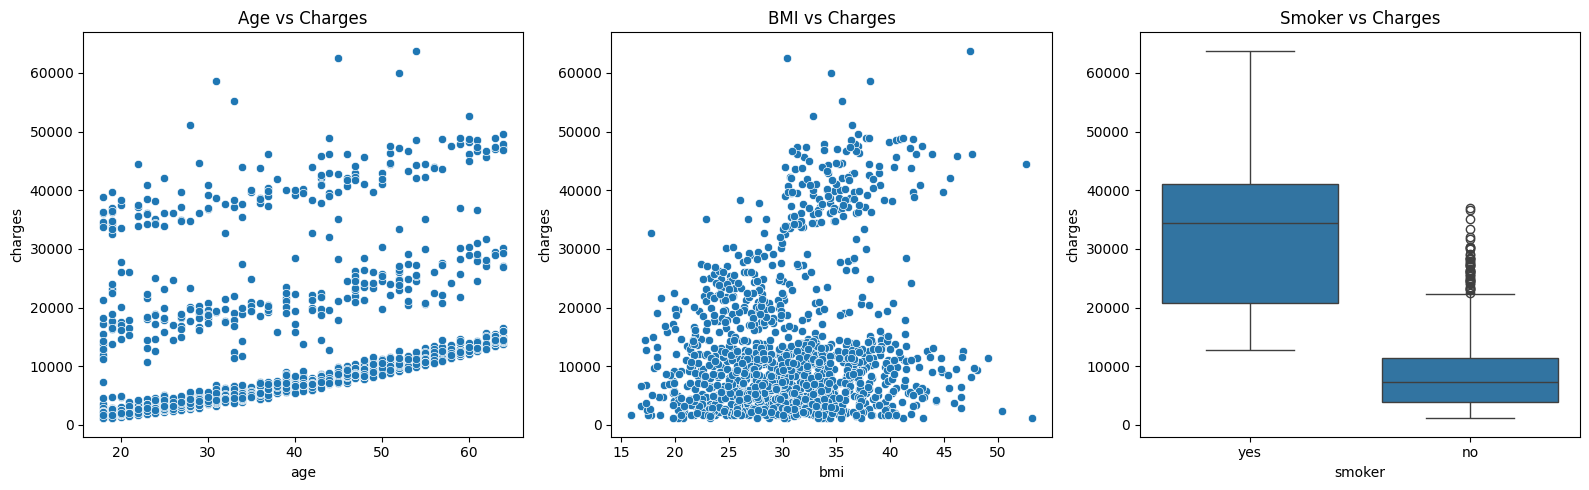

In [11]:
plt.figure(figsize=(16, 5))

# Age vs Charges
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs Charges')

# BMI vs Charges
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('BMI vs Charges')

# Smoker vs Charges
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Smoker vs Charges')

plt.tight_layout()
plt.show()


In [5]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = lr_model.predict(X_test)


In [8]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28


In [9]:
coeff_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df.sort_values(by='Coefficient', ascending=False))


                   Coefficient
smoker_yes        23651.128856
children            425.278784
bmi                 337.092552
age                 256.975706
sex_male            -18.591692
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354
